In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read in the data set
FILE_NAME = r"C:\Users\micha\Dropbox\RedditComment\Model_Creation\ICO-sheet-w-features.xlsx"
df = pd.read_excel(FILE_NAME)
print(df)

                 Name  Number of Users  Raised (USD millions)  \
0           0xProject            11151                  24.00   
1              Accord              435                   4.00   
2              AdHive              128                  17.49   
3         AionNetwork             4069                  20.00   
4            ArcBlock             1960                  45.00   
5                BABB              626                  20.00   
6               Banca               40                  20.00   
7             BankEra             1112                 150.95   
8                 CLN                2                  22.90   
9            CoinLion               51                   7.00   
10          Copytrack               37                  11.09   
11            CREDITS             1124                  22.57   
12            Current              589                  36.00   
13         Datawallet               74                  40.00   
14    Debitum Network    

In [3]:
print(df.shape)
print(df.describe())

(54, 12)
       Number of Users  Raised (USD millions)  Total # of Posts & Comments  \
count         54.00000              54.000000                    54.000000   
mean        3283.00000              32.287407                   876.722222   
std         9037.25001              42.889187                  1578.656778   
min            1.00000               3.000000                     0.000000   
25%          166.00000              15.465000                    49.000000   
50%          458.00000              22.000000                   340.000000   
75%         1380.50000              36.375000                   842.750000   
max        60414.00000             300.000000                  8477.000000   

       SentiMScore  Weighted Average Sentiment  ICO Run Time  ICO Price  \
count    54.000000                   54.000000     54.000000  54.000000   
mean    272.299317                    0.310869     28.055556   0.447441   
std     558.765145                    0.179749     24.384047   

In [4]:
# Put the features in one set and the y variable in the other
x = df.drop(['Success', 'Name', 'Raised (USD millions)'], 1)    # Always drop 'Name'
y = df['Success']
print(x)

    Number of Users  Total # of Posts & Comments  SentiMScore  \
0             11151                         5053  1617.000000   
1               435                           56     1.071429   
2               128                           62    10.511900   
3              4069                          428   215.268400   
4              1960                         5995  2647.749000   
5               626                          876   235.566600   
6                40                            6    38.571430   
7              1112                         2323   412.347900   
8                 2                            0     0.000000   
9                51                           25    14.020410   
10               37                           27     0.314286   
11             1124                         1711   -11.596700   
12              589                          474   277.582800   
13               74                           31    15.678570   
14              356      

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Split the data
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
# 1. Creating a K Nearest Neighbors
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(xTrain, yTrain)
print("KNeighbors: " + str(clf.score(xTest, yTest)))

lda = LinearDiscriminantAnalysis()
lda.fit(xTrain, yTrain)
print("LDA: " + str(lda.score(xTest, yTest)))

# 2. Creating a Decision Tree
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(xTrain, yTrain)
print("Decision Tree: " + str(tree.score(xTest, yTest)))

# 3. Creating a Logistic Regression
logitReg = LogisticRegression()
logitReg.fit(xTrain, yTrain)
print("Logistical: " + str(logitReg.score(xTest, yTest)))

# 4. Create a Gaussian Naive Bayes
bayes = GaussianNB()
bayes.fit(xTrain, yTrain)
print("Gaussian NB: " + str(bayes.score(xTest, yTest)))


KNeighbors: 0.909090909091
LDA: 0.818181818182
Decision Tree: 0.818181818182
Logistical: 0.727272727273
Gaussian NB: 0.363636363636


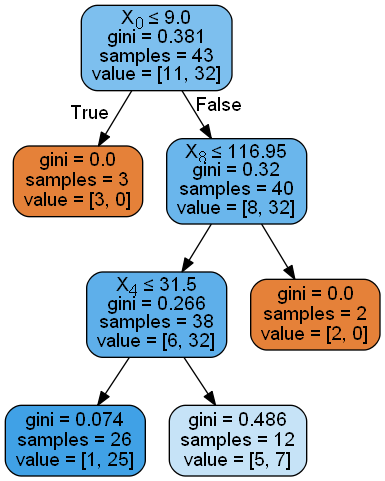

In [8]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from surprise.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=10)
rf.fit(xTrain, yTrain)
rf.score(xTest, yTest)

0.81818181818181823

In [13]:
from sklearn.ensemble import BaggingClassifier
treeBag = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=20)
treeBag.fit(xTrain, yTrain)
print("Decision Tree: " + str(treeBag.score(xTest, yTest)))

kNeighboursBagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=1.0, n_estimators=20)
kNeighboursBagging.fit(xTrain, yTrain)
print("KNeighbors Classifier: " + str(kNeighboursBagging.score(xTest, yTest)))

logit = BaggingClassifier(LogisticRegression(), max_samples=0.5, max_features=1.0, n_estimators=20)
logit.fit(xTrain, yTrain)
print("Logistic Regression: " + str(logit.score(xTest, yTest)))

gaussianBag = BaggingClassifier(GaussianNB(), max_samples=0.5, max_features=1.0, n_estimators=20)
gaussianBag.fit(xTrain, yTrain)
print("Gaussian NB: " + str(gaussianBag.score(xTest, yTest)))

ldaBag = BaggingClassifier(LinearDiscriminantAnalysis(), max_samples=0.5, max_features=1.0, n_estimators=20)
ldaBag.fit(xTrain, yTrain)
print("LDA : " + str(ldaBag.score(xTest, yTest)))

Decision Tree: 0.909090909091
KNeighbors Classifier: 0.909090909091
Logistic Regression: 0.909090909091
Gaussian NB: 0.636363636364
LDA : 0.909090909091


In [18]:
def runModelTest(model, dt):
    results = []
    for i in range(0, 1000):
        try:
            modelTest = BaggingClassifier(model, max_samples=0.5, max_features=1.0, n_estimators=20)
            modelTest.fit(xTrain, yTrain)
            results.append(modelTest.score(xTest, yTest))
        except:
            print("A model result was skipped due to error.")
    arr = np.array(results)
    print("Model Name: " + dt)
    print("Mean: " + str(np.mean(arr, axis=0)))
    print("Standard Deviation: " + str(np.std(arr, axis=0)))
    
runModelTest(DecisionTreeClassifier(), "Decision Tree")
runModelTest(KNeighborsClassifier(), "KNN")
runModelTest(LogisticRegression(), "Logistic Reg")
runModelTest(GaussianNB(), "Gaussian")
runModelTest(LinearDiscriminantAnalysis(), "LDA")

Model Name: Decision Tree
Mean: 0.809090909091
Standard Deviation: 0.0857634648369/n
Model Name: KNN
Mean: 0.909090909091
Standard Deviation: 1.11022302463e-16/n
Model Name: Logistic Reg
Mean: 0.890909090909
Standard Deviation: 0.0363636363636/n
Model Name: Gaussian
Mean: 0.590909090909
Standard Deviation: 0.0838140405208/n
Model Name: LDA
Mean: 0.854545454545
Standard Deviation: 0.0603022689156/n


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [19]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('tree', treeBag), 
                                     ('KNN', kNeighboursBagging), 
                                     ('Logit', logit), 
                                     ('Gaussian', gaussianBag), 
                                     ('LDA', ldaBag)
                                    ], voting='hard')
from sklearn.ensemble import VotingClassifier
eclf2 = VotingClassifier(estimators=[('tree', treeBag), 
                                     ('KNN', kNeighboursBagging), 
                                     ('Logit', logit), 
                                     ('Gaussian', gaussianBag), 
                                     ('LDA', ldaBag)
                                    ])
from sklearn.ensemble import VotingClassifier
eclf3 = VotingClassifier(estimators=[('tree', treeBag), 
                                     ('KNN', kNeighboursBagging), 
                                     ('Logit', logit), 
                                     ('Gaussian', gaussianBag), 
                                     ('LDA', ldaBag)
                                    ], voting='soft', weights=[2,2,2, 1,2])
eclf1 = eclf1.fit(xTrain, yTrain)
eclf2 = eclf2.fit(xTrain, yTrain)
eclf3 = eclf3.fit(xTrain, yTrain)
print("Vote Classifier: " + str(eclf1.score(xTest, yTest)))
print("Vote Classifier: " + str(eclf2.score(xTest, yTest)))
print("Vote Classifier: " + str(eclf3.score(xTest, yTest)))

Vote Classifier: 0.909090909091
Vote Classifier: 0.909090909091
Vote Classifier: 0.909090909091
